# ML Final Project


### Shruti Kotha, Mia Tey, Jeni Pham, and Shruti Patel

## Table of Contents 

1. [Final Project Objective](#Objective)
2. [Part 1. Data Preparation and Data Cleaning for Modeling](#Part-1)
3. [Part 2. Data Exploration](#Part-2)
4. [Part 3. Feature Engineering for Models](#Part-3-Feature-Engineering-for-Models)
5. [Part 4. Data Modeling](#Part-4-Data-Modeling)
5. [Part 5. Outcome and Results](#Outcome)

### Added necessary imports

In [263]:
#add imports
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import warnings

## Final Project Objective: <a id='Objective'></a>

**Goal:** The primary objective of this project is to assist in predicting the outcomes of new intakes at the Austin Animal Center, with a specific focus on dogs. By leveraging various features such as age, breed, color, animal type, sex upon outcome, outcome subtype, and name, our aim is to develop a predictive model that can categorize outcomes into classes like Foster, Adoption, Transfer, or Euthanize.

**Why We Want to Do This:**

1. **Optimizing Resource Allocation:** Predicting the outcomes of new intakes enables the Austin Animal Center to allocate resources more efficiently. For instance, if we can accurately predict that a certain dog is likely to be adopted quickly, the center can prioritize resources, such as marketing efforts or special adoption events, for other animals that may need more assistance in finding suitable homes.

2. **Enhancing Animal Welfare:** We can ensure that appropriate care and attention are given to animals that might face challenges in finding suitable homes, increasing the chances of positive outcomes for all animals.

3. **Reducing Euthanasia Rates:** If we can identify factors that contribute to positive outcomes such as adoption or fostering, the center can implement targeted strategies to reduce euthanasia rates. We can determine which dogs are more likely to be euthanized and add additional staff to focus on their well being to avoid euthnasia.

**Problems That Can Be Solved by Predicting Outcomes:**

1. **Overcrowding:** Animal shelters often face challenges related to overcrowding. By predicting outcomes, shelters can implement proactive measures to address potential overcrowding issues, such as encouraging adoptions or transfers to partner organizations.

2. **Resource Management:** Limited resources, including staff time, funding, and space, are common issues in animal shelters. Predicting outcomes allows for better resource management, directing efforts toward animals that require more attention and increasing the efficiency of daily operations.

3. **Animal Well-being:** Ensuring the well-being of animals is a fundamental goal for any animal center. We can help create care plans based on the expected duration of stay and the likelihood of adoption, thereby improving the overall quality of life for the animals.

In summary, by developing this prediction model, the Austin Animal Center can enhance its operational efficiency, improve the lives of the animals in its care, and work towards the broader goal of creating a more sustainable and compassionate approach to animal welfare.

## Our dataset: 
Our chosen dataset gives information about the Animal Center Outcomes from Oct, 1st 2013 to present. The dataset has 156,218 records and 10 features. Our dataset can be found here: Data.gov: Austin Animal Center Outcomes https://www.google.com/url?q=https://catalog.data.gov/dataset/austin-animal-center-outcomes&sa=D&source=docs&ust=1700010068639490&usg=AOvVaw1x_TF7vgepvCGaLXp_ri01


## Part 2A. Data Preparation - Data Exploration and Data Cleaning for Modeling <a id='Part-1'></a>
For this part of the assignment, we read in our data and will perform various data prep techniques like data cleaning and feature engineering to prepare our data for modeling.


In [264]:
data = pd.read_csv('animaloutcomes.csv', skipinitialspace = True)
data.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


Here we view the distribution of "Outcome Type". We want to ensure there is no irregularities within this column since it will be our label data when modeling. If there are any records that lack an entry for "Outcome Type" we drop them. 

In [265]:
outcome_counts = data['Outcome Type'].value_counts()
print(outcome_counts)

Outcome Type
Adoption           73675
Transfer           44935
Return to Owner    24404
Euthanasia          9959
Died                1468
Rto-Adopt           1061
Disposal             758
Missing               84
Relocate              27
Stolen                 5
Name: count, dtype: int64


In [266]:
print("Length before droping Outcome Type: ", len(data['Outcome Type']))
data = data.dropna(subset=['Outcome Type'])
print("Length after drop Outcome Type: ", len(data['Outcome Type']))

Length before droping Outcome Type:  156406
Length after drop Outcome Type:  156376


We now want to drop unnecessary columns, as we will only keep features relevant to the outcome type for modeling. We drop outcome subtype because many of the entries (84276) in this column have missing info. Furthermore, the ones with descriptions would be difficult to parse/categorize since they are so different from each other. Also, this column is very similar to our label (Outcome). We wouldn't want our models to be exposed to this information before making predictions to prevent **data leakage**. 

In [267]:
print("Number of empty records for outcome subtype:", data['Outcome Subtype'].isna().sum())
print("\nOutcome subtype frequency distribution")
outcome_counts = data['Outcome Subtype'].value_counts()
print(outcome_counts)

Number of empty records for outcome subtype: 84276

Outcome subtype frequency distribution
Outcome Subtype
Partner                37307
Foster                 15332
Rabies Risk             4472
Suffering               3816
Snr                     3458
SCRP                    3211
Out State                931
In Kennel                773
Aggressive               597
Offsite                  495
In Foster                370
Medical                  340
At Vet                   322
Field                    183
Behavior                 167
Enroute                  102
Court/Investigation       62
Underage                  37
In Surgery                32
Customer S                18
Possible Theft            16
Emergency                 15
Prc                       13
Barn                      12
In State                  12
Emer                       7
Name: count, dtype: int64


We also drop the names feature because there are many unique names for pets, and names are difficult to categorize for engineering. For now, we will focus on the other features for the context of this project. Additionally, many of the pets also have their IDs representing their names, so there wouldn't necessarily be a recognizable correlation for names to relate to outcome type.

In [268]:
print("Number of empty records for names:", data['Name'].isna().sum())
print("\nName frequency distribution")
outcome_counts = data['Name'].value_counts()
print(outcome_counts)


Number of empty records for names: 44971

Name frequency distribution
Name
Max            673
Luna           662
Bella          632
Rocky          455
Daisy          442
              ... 
Volare           1
Bunny Holly      1
A863295          1
Coogler          1
A854626          1
Name: count, Length: 27309, dtype: int64


We drop date/time because for our date representation in modeling we will end up using the MonthYear column instead. We also drop date of birth because we have a separate age column to represent the age of the pet. Animal ID is also dropped because it won't be useful for our modeling.

In [269]:
data.drop(columns=['Outcome Subtype', 'Name', 'DateTime', 'Date of Birth', 'Animal ID'], inplace=True)
# print the head to ensure only columns important to us are in the dataset
data.head()

,MonthYear,Outcome Type,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,May 2019,Rto-Adopt,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,Jul 2018,Adoption,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,Aug 2020,Euthanasia,Other,Unknown,1 year,Raccoon,Gray
3,Feb 2016,Adoption,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,Mar 2014,Transfer,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby



We will now further explore the data to gain insights and better understand its characteristics.

We will be graphing data distributions as part of data exploration and will be looking for any imbalances, outliers, or anything that could potentially skew the results of our data.
Using this information, we'll adjust the data before modeling.

Let's start with looking at the distribution of the colors feature. Here's the data for it.

In [270]:
print("\nColor frequency distribution")
outcome_counts = data['Color'].value_counts()
print(outcome_counts)


Color frequency distribution
Color
Black/White             16303
Black                   13052
Brown Tabby              9264
Brown                    6497
White                    5489
                        ...  
Brown Tabby/Blue            1
Blue Tabby/Buff             1
Chocolate/Gold              1
Torbie/Calico               1
Yellow Brindle/Brown        1
Name: count, Length: 635, dtype: int64


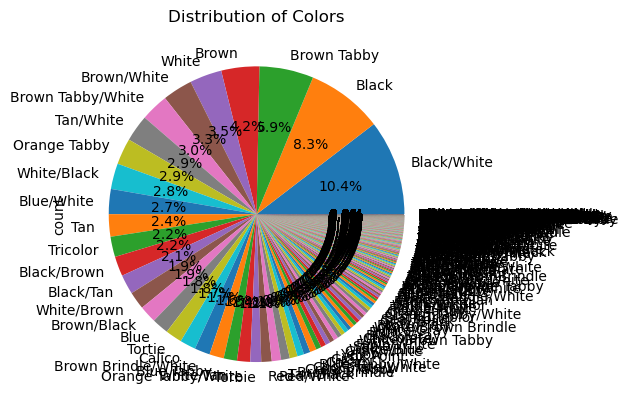

In [271]:
color_counts = data['Color'].value_counts()
color_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Colors')
plt.show()

There are 635 different colors. As the chart shows, this can be challenging to categorize and represent in our modeling accurately. Additionally, there are animal colors of low frequencies that can influence the prediction our models make in an inaccurate way. Also many duplicates are present (ex: Black/Brown, Brown/Black) Let's clean up this color column and simplify the categories by removing duplicates and prioritizing high frequency colors in animals. 

First, there are entries such as 'black/white' and 'white/black' let's combine these into one label.
Second, there are a lot of unique combinations of two colors. For these records whose combination of color makes up <5% of all colors, add these into one column called 'Multicolor' and jointly categorize it with the 'Tricolor' attribute.

In [272]:
color_count_before = len(data['Color'].value_counts())
print("Number of unique colors before: ", color_count_before)

# Combine categories such as 'black/white' and 'white/black'
def join_same_color(color):
    color_components = color.split('/')
    color_components.sort()
    return '/'.join(color_components)
data['Color'] = data['Color'].apply(join_same_color)

# Create Multicolor category 
color_counts = data['Color'].value_counts()
color_percent = color_counts / color_counts.sum() * 100
less_than_5_percent = color_percent[color_percent < 1].index
data['Color'] = data['Color'].apply(lambda x: 'Multicolor' if x in less_than_5_percent or x == 'Tricolor' else x)
print("Number of unique colors after: ", len(data['Color'].value_counts()))


Number of unique colors before:  635
Number of unique colors after:  23


We were able to successfully reduce the excessive number of unique colors in the dataset and make this data column a lot easier for the models to parse through to make predictions. Here is the plot for the new distribution of colors. 

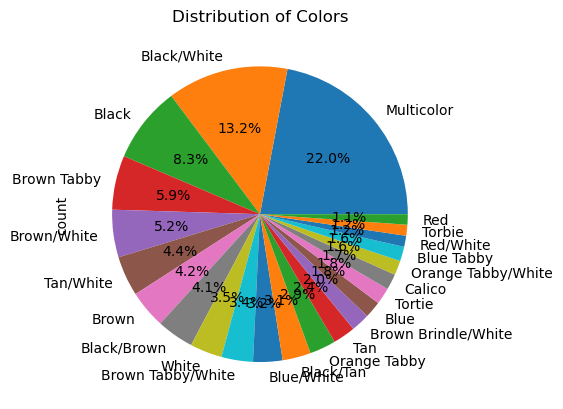

In [273]:
color_counts = data['Color'].value_counts()
color_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Colors')
plt.show()

Let's look at the distribution of the adoption month/year column now.

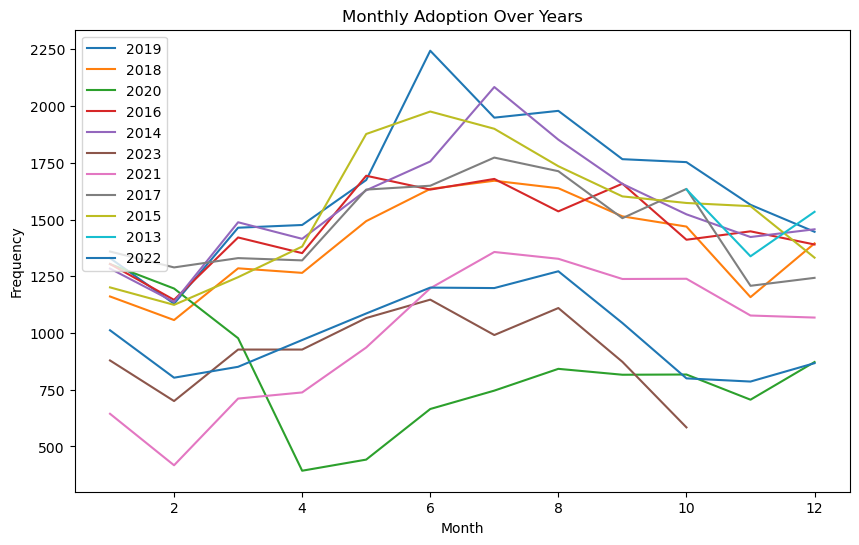

In [274]:
data['Month'] = pd.to_datetime(data['MonthYear'], format='%b %Y').dt.month
data['Year'] = pd.to_datetime(data['MonthYear'], format='%b %Y').dt.year

monthly_frequency = data.groupby(['Year', 'Month']).size().unstack().T

# Plot the data
plt.figure(figsize=(10, 6))

for year in data['Year'].unique():
    plt.plot(monthly_frequency.index, monthly_frequency[year], label=str(year))

plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Monthly Adoption Over Years')
plt.legend()
plt.show()


The data is recorded from over a decade. Many months/years are represented within the dataset which can make it difficult for models use this info to make quality predictions. Additionally, past years aren't neccessarily helpful for us to track as a feature because they don't offer any additional insight that we can apply to future pet adoption considerations. Thus, we will focus on using months. 

We can still further categorize months into seasons as each month's scope can still be too broad to determine animal outcomes accurately. This will simplify the month/year column for modeling. Here we create a new column for seasons and drop the Year/Month columns we temporarily made.

In [275]:
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'
    
data['Month'] = pd.to_datetime(data['MonthYear'], format='%b %Y').dt.month
data['Season'] = data['Month'].apply(get_season)

data.head()

,MonthYear,Outcome Type,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Month,Year,Season
0,May 2019,Rto-Adopt,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,5,2019,Spring
1,Jul 2018,Adoption,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,Brown/White,7,2018,Summer
2,Aug 2020,Euthanasia,Other,Unknown,1 year,Raccoon,Multicolor,8,2020,Summer
3,Feb 2016,Adoption,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Multicolor,2,2016,Winter
4,Mar 2014,Transfer,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,3,2014,Spring


Let's view the distribution of pets within each month

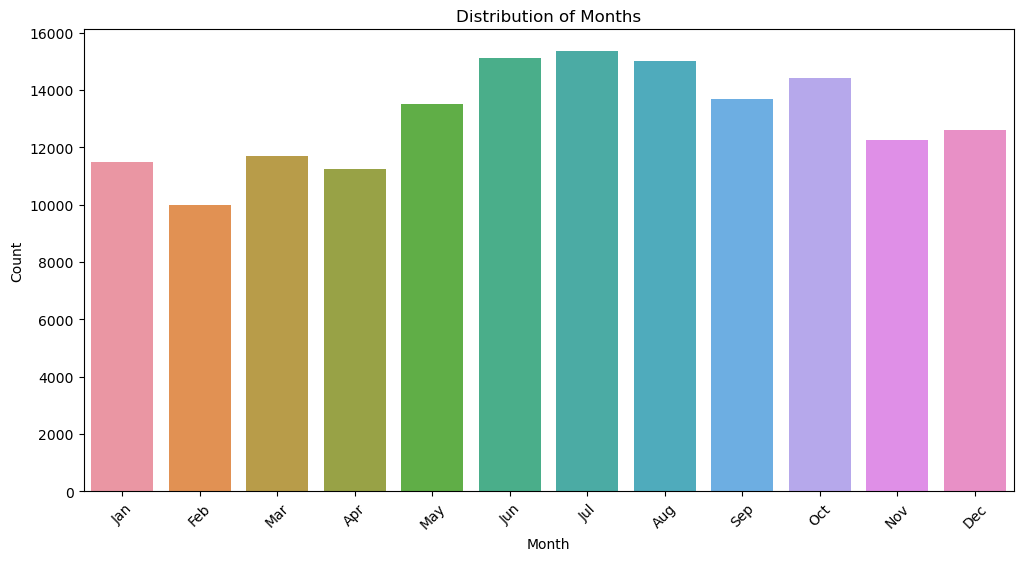

In [276]:
month_data = data['MonthYear']
df = pd.DataFrame(month_data)
pattern = r'([a-zA-Z]{3}) \d{4}'
df['MonthYear'] = df['MonthYear'].str.extract(pattern)
# print(df)
data.head()
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

month_counts = df['MonthYear'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=month_counts.index, y=month_counts.values, order=month_order)
plt.title('Distribution of Months')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


There isn't an alarmingly outlier so we can keep the data as is and combine months into seasons.

In [277]:
data = data.drop('Month', axis=1)
data = data.drop('Year', axis=1)
data = data.drop('MonthYear', axis=1)


Here is the display of the new distribution of seasons and outcomes

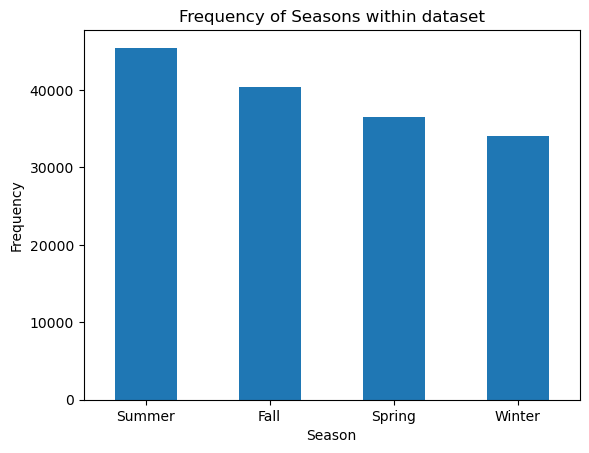

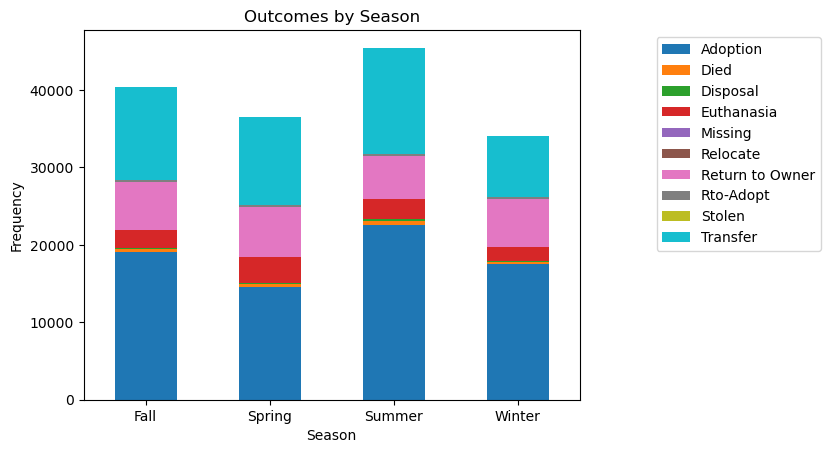

In [278]:
season_counts = data['Season'].value_counts()
season_counts.plot(kind='bar')
plt.title('Frequency of Seasons within dataset')
plt.xlabel('Season')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  
plt.show()

outcome_by_season = pd.crosstab(data['Season'], data['Outcome Type'])
outcome_by_season.plot(kind='bar', stacked=True)
plt.title('Outcomes by Season')
plt.xlabel('Season')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))

plt.show()

Now, let's explore the animal type and breeds features. 

In [279]:
print("\nAnimal Type distribution")
outcome_counts = data['Animal Type'].value_counts()
print(outcome_counts)


Animal Type distribution
Animal Type
Dog          86524
Cat          60834
Other         8218
Bird           773
Livestock       27
Name: count, dtype: int64


The majority of data is cat and dog records. However, there are also birds, livestock, and other animals in this dataset. We decided to remove the birds and livestock data records because they are a small minority of the data. We also removed the "other" animal type records category because it's difficult to categorize them in a broader model because we don't know what the type of animals they. They could have a dramatic influence on our models, but we wouldn't be able pinpoint the specific data causing the issues. Finally, we chose to stick with one animal type because the conditions/attributes of a particular species of animal that leads to their outcome can be very different when comparing species. Having multiple species in our models can taint our predictions as each species features could influence the outcome predictions in different ways. 

Now lets look at breeds.

In [280]:
print("\nAnimal Breed distribution")
outcome_counts = data['Breed'].value_counts()
print(outcome_counts)


Animal Breed distribution
Breed
Domestic Shorthair Mix             33588
Domestic Shorthair                 16780
Pit Bull Mix                        9622
Labrador Retriever Mix              8131
Chihuahua Shorthair Mix             6758
                                   ...  
Afghan Hound/Labrador Retriever        1
Chesa Bay Retr/Pit Bull                1
Pekingese/Toy Poodle                   1
Pomeranian/Cairn Terrier               1
Pointer/English Coonhound              1
Name: count, Length: 2881, dtype: int64


There are a vast number of unique breeds in this dataset (2881). We need a clearer way to categorize these breeds, so our models can interpret the data we pass into them well. Passing in individual breeds might be too specific for the model to generalize for outside / new instances of data. We need a way to condense this data.


The solution we decided to pursue is choosing the most frequently seen breeds in the dataset (we chose the top 100) and further categorize the specific breeds into sizes. We engineered a new column for species size and mapped each breed (out of the most 100 popular) into their respective size category. 

This is the website we used to bucket breeds into sizes: https://www.trainpetdog.com/dog-breed-size-chart/. Here we condense the animal type and breed columns

In [281]:
# only keep records that are Dogs
records_to_keep = ['Dog']
dog_data = data[data['Animal Type'].isin(records_to_keep)]

# only keep top 100 most frequent dog breeds in dataset
top_100_breeds = dog_data['Breed'].value_counts().head(100).index
breeds_data = dog_data[dog_data['Breed'].isin(top_100_breeds)]
breeds_data = breeds_data.copy()

breed_to_category = {
    'Pit Bull Mix': 'Medium/Large Breeds',
    'Labrador Retriever Mix': 'Medium/Large Breeds',
    'Chihuahua Shorthair Mix': 'Small Breeds',
    'German Shepherd Mix': 'Medium/Large Breeds',
    'Pit Bull': 'Medium/Large Breeds',
    'Australian Cattle Dog Mix': 'Medium/Large Breeds',
    'Chihuahua Shorthair': 'Small Breeds',
    'Labrador Retriever': 'Medium/Large Breeds',
    'German Shepherd': 'Medium/Large Breeds',
    'Dachshund Mix': 'Medium/Small Breeds', 
    'Boxer Mix': 'Medium/Large Breeds',
    'Border Collie Mix': 'Medium/Large Breeds',
    'Miniature Poodle Mix': 'Small Breeds',
    'Siberian Husky Mix': 'Medium Breeds',
    'Australian Shepherd Mix': 'Medium/Large Breeds',
    'Catahoula Mix': 'Medium/Large Breeds',
    'Staffordshire Mix': 'Medium/Large Breeds',
    'Siberian Husky': 'Medium Breeds',
    'Rat Terrier Mix': 'Small Breeds',
    'Great Pyrenees Mix': 'Large Breeds',
    'Yorkshire Terrier Mix': 'Small Breeds',
    'Beagle Mix': 'Medium/Large Breeds',
    'Miniature Schnauzer Mix': 'Medium/Small Breeds',
    'Jack Russell Terrier Mix': 'Medium/Small Breeds',
    'Pointer Mix': 'Large Breeds',
    'Cairn Terrier Mix' : 'Small Breeds',
    'American Bulldog Mix': 'Medium/Large Breeds',                      
    'Chihuahua Longhair Mix': 'Small Breeds',   
    'Anatol Shepherd Mix': 'Medium/Large Breeds',
    'Rottweiler Mix': 'Medium/Large Breeds',
    'Australian Cattle Dog': 'Medium Breeds',
    'Black Mouth Cur Mix': 'Medium/Large Breeds',
    'Plott Hound Mix': 'Medium/Large Breeds',
    'Labrador Retriever/Pit Bull': 'Medium/Large Breeds',
    'Australian Kelpie Mix': 'Medium Breeds',
    'Shih Tzu Mix': 'Small Breeds',
    'Chihuahua Shorthair/Dachshund': 'Small Breeds',
    'Great Pyrenees': 'Large Breeds',
    'American Pit Bull Terrier Mix': 'Medium/Large Breeds',
    'German Shepherd/Labrador Retriever': 'Large Breeds',
    'Dachshund/Chihuahua Shorthair': 'Small Breeds',
    'Labrador Retriever/German Shepherd': 'Large Breeds',
    'American Staffordshire Terrier Mix': 'Medium/Large Breeds',
    'Rottweiler': 'Large Breeds',
    'Boxer': 'Medium/Large Breeds',
    'Shih Tzu': 'Small Breeds',
    'Pit Bull/Labrador Retriever': 'Medium/Large Breeds',
    'Dachshund': 'Small Breeds',
    'Golden Retriever Mix': 'Large Breeds',
    'Maltese Mix': 'Small Breeds',
    'Border Terrier Mix': 'Small Breeds',
    'Miniature Pinscher Mix': 'Small Breeds',
    'Yorkshire Terrier': 'Small Breeds',
    'Blue Lacy Mix': 'Medium/Large Breeds',
    'Doberman Pinsch Mix': 'Medium/Large Breeds',
    'Miniature Poodle': 'Small Breeds',
    'Chow Chow Mix': 'Medium/Large Breeds',
    'American Pit Bull Terrier': 'Medium/Large Breeds',
    'Cairn Terrier': 'Small Breeds',
    'Border Collie': 'Medium/Large Breeds',
    'Queensland Heeler Mix': 'Medium Breeds',
    'Doberman Pinsch': 'Medium/Large Breeds',
    'Basset Hound Mix': 'Medium/Large Breeds',
    'Labrador Retriever/Border Collie': 'Large Breeds',
    'Alaskan Husky Mix': 'Medium/Large Breeds',
    'Pug Mix': 'Small Breeds',
    'Beagle': 'Small Breeds',
    'Pomeranian Mix': 'Small Breeds',
    'Mastiff Mix': 'Large Breeds',
    'Cocker Spaniel Mix': 'Small Breeds',
    'Cardigan Welsh Corgi Mix': 'Medium Breeds',
    'Miniature Schnauzer': 'Small Breeds',
    'Lhasa Apso Mix': 'Small Breeds',
    'Chinese Sharpei Mix': 'Medium/Large Breeds',
    'Australian Shepherd': 'Medium/Large Breeds',
    'Labrador Retriever/Australian Cattle Dog': 'Medium/Large Breeds',
    'Black/Tan Hound Mix': 'Medium/Large Breeds',
    'Pug': 'Small Breeds',
    'Chihuahua Longhair': 'Small Breeds',
    'Great Dane Mix': 'Large Breeds',
    'Boston Terrier Mix': 'Small Breeds',
    'Border Collie/Labrador Retriever': 'Large Breeds',
    'Labrador Retriever/Great Pyrenees' : 'Large Breeds',
    'Dachshund Wirehair Mix' : 'Small Breeds',
    'Dachshund Longhair Mix' : 'Small Breeds',
    'Alaskan Husky' : 'Medium/Large Breeds',
    'Flat Coat Retriever Mix' : 'Large Breeds',
    'Manchester Terrier Mix' : 'Small Breeds',
    'Toy Poodle Mix' : 'Small Breeds',
    'American Bulldog' : 'Medium/Large Breeds',
    'Rat Terrier' : 'Small Breeds',
    'Collie Smooth Mix' : 'Medium/Large Breeds',
    'Maltese' : 'Small Breeds',
    'Anatol Shepherd' : 'Medium/Large Breeds',
    'Staffordshire' : 'Medium/Large Breeds',
    'Belgian Malinois Mix' : 'Medium/Large Breeds',
    'Pit Bull/Boxer' : 'Medium/Large Breeds',
    'Norfolk Terrier Mix' : 'Small Breeds',
    'Australian Cattle Dog/Labrador Retriever' : 'Medium/Large Breeds',
    'Rhod Ridgeback Mix' : 'Large Breeds'         
}
print()
print("Distribution based on size of breed:")

categories = [breed_to_category.get(breed) for breed in breeds_data['Breed']]

category_counts = Counter(categories)

# make sure there is still sufficent data for each size of the animal
for category, count in category_counts.items():
    print(f'{category}: {count}')

# to do add a size category with the breed to wsize mapping
breeds_data.loc[:, 'Size'] = breeds_data['Breed'].map(breed_to_category)
dog_data = breeds_data


# drop breed and animal type
dog_data.drop(columns=['Breed', 'Animal Type'], inplace=True)
# make sure there is a new Size column that reflects the size of the breed for that animal
dog_data.head()





Distribution based on size of breed:
Small Breeds: 17145
Medium/Large Breeds: 41783
Large Breeds: 3911
Medium Breeds: 2854
Medium/Small Breeds: 2448


,Outcome Type,Sex upon Outcome,Age upon Outcome,Color,Season,Size
1,Adoption,Neutered Male,1 year,Brown/White,Summer,Small Breeds
5,Adoption,Spayed Female,7 years,Brown,Fall,Small Breeds
13,Return to Owner,Intact Female,2 years,Blue/White,Summer,Medium/Large Breeds
14,Transfer,Intact Female,2 years,Black/White,Fall,Small Breeds
27,Adoption,Neutered Male,9 years,Multicolor,Summer,Small Breeds


Let's look at the new distribution of data for the animal breeds sizes.

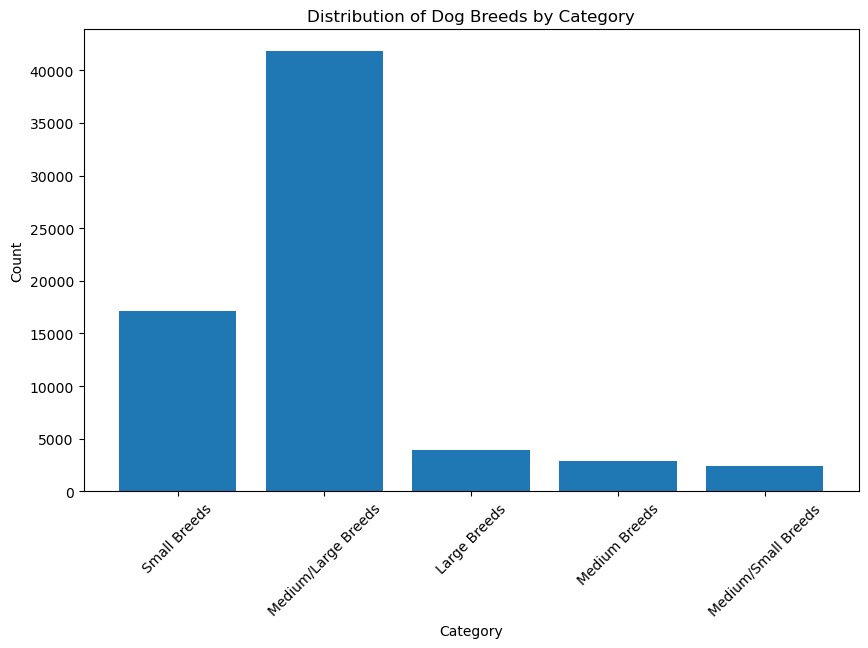

In [282]:
category_labels = [label for label, value in category_counts.items() if label is not None]
category_values = [value for label, value in category_counts.items() if label is not None]


plt.figure(figsize=(10, 6))
plt.bar(category_labels, category_values)
plt.title('Distribution of Dog Breeds by Category')
plt.xlabel('Category')
plt.ylabel('Count')

plt.xticks(rotation=45)

plt.show()

It's interesting to note that a majority of our dogs are Medium/Large Breeds. There are also many small breed dogs.

Let's clean up our last few columns. We'll start with dog sex and sex subtype upon outcome.

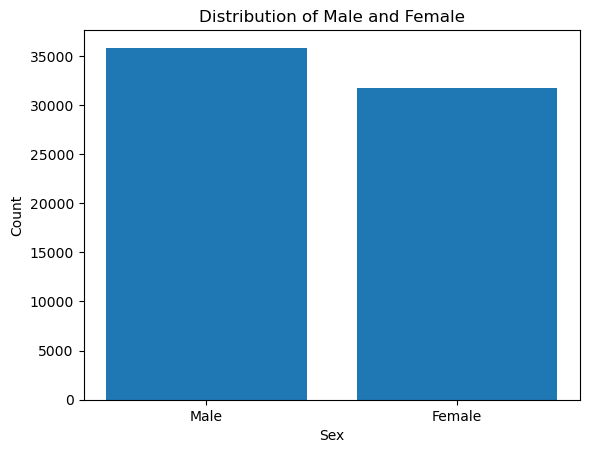

Number of Males: 35836
Number of Females: 31739


In [283]:
sex_upon_outcome = dog_data["Sex upon Outcome"]

male = 0
female = 0

for outcome in sex_upon_outcome:
    if pd.notna(outcome):
        if "Male" in outcome:
            male += 1
        elif "Female" in outcome:
            female += 1

        
categories = ["Male", "Female"]
counts = [male, female]

plt.bar(categories, counts)
plt.title("Distribution of Male and Female")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

print(f"Number of Males: {male}")
print(f"Number of Females: {female}")

Sex upon Outcome
Neutered Male    27445
Spayed Female    24152
Intact Male       8391
Intact Female     7587
Unknown            565
Name: count, dtype: int64


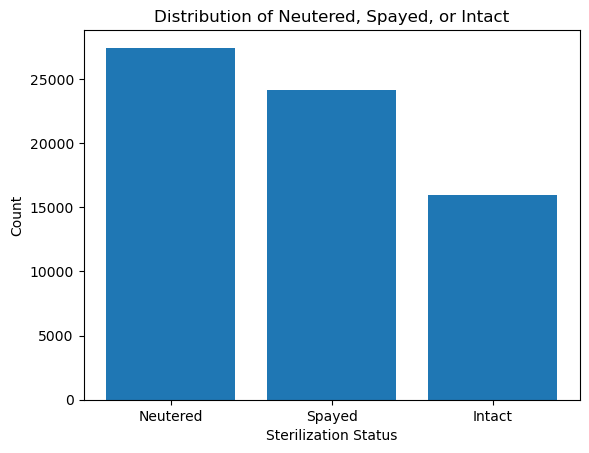

Number of Neutered: 27445
Number of Spayed: 24152
Number of Intact: 15978


In [284]:
neutered = 0
spayed = 0
intact = 0

sex_counts = dog_data["Sex upon Outcome"].value_counts()
print(sex_counts)

for outcome in sex_upon_outcome:
    if pd.notna(outcome):
        if "Neutered" in outcome:
            neutered += 1
        elif "Spayed" in outcome:
            spayed += 1
        elif "Intact" in outcome: 
            intact += 1
        
categories = ["Neutered", "Spayed", "Intact"]
counts = [neutered, spayed, intact]

plt.bar(categories, counts)
plt.title("Distribution of Neutered, Spayed, or Intact")
plt.xlabel("Sterilization Status")
plt.ylabel("Count")
plt.show()

print(f"Number of Neutered: {neutered}")
print(f"Number of Spayed: {spayed}")
print(f"Number of Intact: {intact}")


There isn't anything unusual about these two columns, so we can keep them as is. 

Finally, we will look at the age column.

In [285]:
print("\nAnimal Age distribution")
outcome_counts = dog_data['Age upon Outcome'].value_counts()
print(outcome_counts)


Animal Age distribution
Age upon Outcome
2 years      13099
1 year       12532
2 months      6050
3 years       5409
4 years       3173
5 years       2938
1 month       2217
6 years       1934
4 months      1753
3 months      1737
5 months      1672
7 years       1663
8 years       1618
6 months      1482
8 months      1315
10 months     1294
10 years      1237
7 months       971
9 years        906
9 months       876
12 years       571
11 months      569
11 years       499
13 years       361
4 weeks        269
14 years       260
2 weeks        252
1 weeks        247
3 weeks        232
15 years       201
1 week         123
2 days         119
1 day          110
16 years       102
3 days          56
0 years         51
6 days          47
17 years        45
4 days          39
5 days          37
5 weeks         30
18 years        21
19 years        10
-1 years         5
20 years         4
-2 years         1
24 years         1
-3 years         1
Name: count, dtype: int64


The data in the age column is pretty inconsistent in the measure of time (some dogs are categorized with years while others months). Plus, there are negative ages we also must clean. Let's convert all the ages to years and also remove the negative age values.

Mean Age (in months): 30.50
Median Age (in months): 12.00
Mode Age (in months): 24


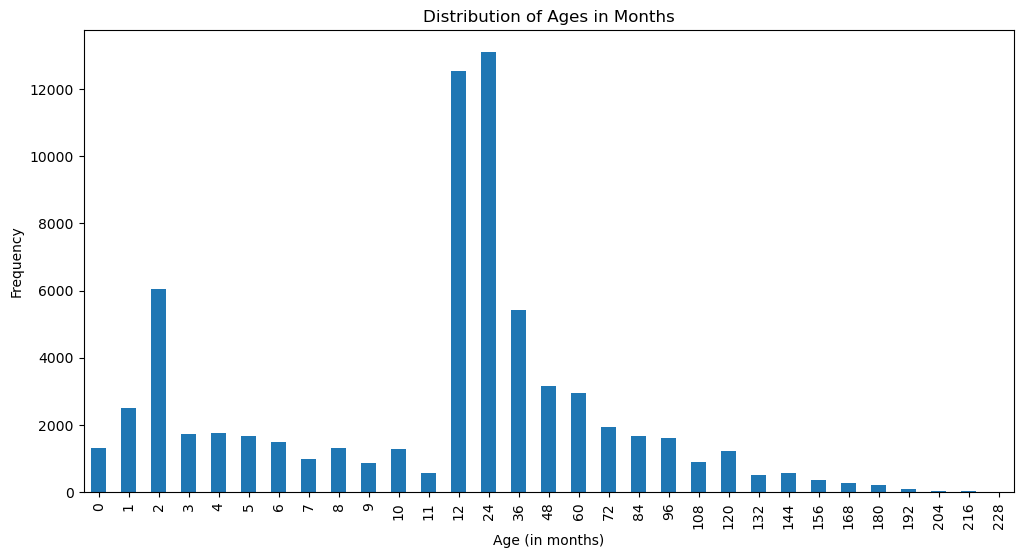

In [286]:
def convert_to_months(age_str):
    # Split the age string into value and unit
    value, unit = age_str.split()
    value = int(value)
    
    if 'year' in unit or 'years' in unit:
        return value * 12
    elif 'month' in unit or 'months' in unit:
        return value
    elif 'week' in unit or 'weeks' in unit:
        return value // 4  # Approximate conversion: 1 month = 4 weeks
    elif 'day' in unit or 'days' in unit:
        return value // 30 # Approximate conversion: 1 month = 30 days
    else:
        return 0  # default case

age_data = dog_data['Age upon Outcome']
df = pd.DataFrame(age_data)
df['Age upon Outcome'] = df['Age upon Outcome'].fillna('0 days')  #  fills NaN with '0 days'
# Apply the conversion function to the column
df['Age upon Outcome'] = df['Age upon Outcome'].apply(convert_to_months)
# print(df.head())

mean_age = df['Age upon Outcome'].mean()
median_age = df['Age upon Outcome'].median()
mode_age = df['Age upon Outcome'].mode()
age_df = df

print(f"Mean Age (in months): {mean_age:.2f}")
print(f"Median Age (in months): {median_age:.2f}")
print(f"Mode Age (in months): {mode_age.iloc[0]}")  

age_counts = df.loc[(df['Age upon Outcome'] >= 0) & (df['Age upon Outcome'] <= 228), 'Age upon Outcome'].value_counts().sort_index()
age_counts.plot(kind='bar', figsize=(12,6))
plt.title('Distribution of Ages in Months')
plt.xlabel('Age (in months)')
plt.ylabel('Frequency')
plt.show()

In [287]:
dog_data = dog_data.drop(columns=['Age upon Outcome'])
dog_data = pd.concat([dog_data, df.iloc[:, 0]], axis=1)
dog_data = dog_data[dog_data['Age upon Outcome'] >= 0]
dog_data.head()

,Outcome Type,Sex upon Outcome,Color,Season,Size,Age upon Outcome
1,Adoption,Neutered Male,Brown/White,Summer,Small Breeds,12
5,Adoption,Spayed Female,Brown,Fall,Small Breeds,84
13,Return to Owner,Intact Female,Blue/White,Summer,Medium/Large Breeds,24
14,Transfer,Intact Female,Black/White,Fall,Small Breeds,24
27,Adoption,Neutered Male,Multicolor,Summer,Small Breeds,108


## Part 2b. Feature Engineering: Encoding <a id='Part-3-Feature-Engineering-for-Models'></a>
We want to numerically represent our data for ease and accuracy of modeling prior to inserting them into our models. They also need to be represented numerically to allow for scaling in the models that need it. 

In [288]:
dog_data.head()


,Outcome Type,Sex upon Outcome,Color,Season,Size,Age upon Outcome
1,Adoption,Neutered Male,Brown/White,Summer,Small Breeds,12
5,Adoption,Spayed Female,Brown,Fall,Small Breeds,84
13,Return to Owner,Intact Female,Blue/White,Summer,Medium/Large Breeds,24
14,Transfer,Intact Female,Black/White,Fall,Small Breeds,24
27,Adoption,Neutered Male,Multicolor,Summer,Small Breeds,108


#### Encode Sex and Color: 
This code performs one-hot encoding on the categorical columns 'Sex upon Outcome' and 'Color' in the 'dog_data' DataFrame, creating binary columns for each category. The encoded columns are then concatenated with the original DataFrame, and the original categorical columns are dropped, resulting in a DataFrame with expanded feature representations for 'Sex upon Outcome' and 'Color'.

In [289]:
encoded_sex = pd.get_dummies(dog_data['Sex upon Outcome'], prefix='Sex upon Outcome').astype(int)
encoded_colors = pd.get_dummies(dog_data['Color'], prefix='Color').astype(int)
dog_data = pd.concat([dog_data, encoded_sex, encoded_colors], axis=1)
dog_data = dog_data.drop(columns=['Color', 'Sex upon Outcome'])
dog_data.head()

,Outcome Type,Season,Size,Age upon Outcome,Sex upon Outcome_Intact Female,Sex upon Outcome_Intact Male,Sex upon Outcome_Neutered Male,Sex upon Outcome_Spayed Female,Sex upon Outcome_Unknown,Color_Black,...,Color_Brown,Color_Brown Brindle/White,Color_Brown/White,Color_Calico,Color_Multicolor,Color_Red,Color_Red/White,Color_Tan,Color_Tan/White,Color_White
1,Adoption,Summer,Small Breeds,12,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,Adoption,Fall,Small Breeds,84,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
13,Return to Owner,Summer,Medium/Large Breeds,24,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,Transfer,Fall,Small Breeds,24,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,Adoption,Summer,Small Breeds,108,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


#### Encode Size: 
This code snippet encodes the 'Size' column in the 'dog_data' DataFrame ordinally based on predefined size categories. It creates a new column named 'Breed size' where each dog's size is represented by an ordinal encoding, and subsequently, the original 'Size' column is dropped from the DataFrame. 

In [290]:
# encode breeds ordinally
sizes = ['Small Breeds', 'Medium/Small Breeds', 'Medium/Large Breeds', 'Large Breeds']

size_encode_mapping = {
    'Small Breeds': 1,
    'Medium/Small Breeds': 2,
    'Medium Breeds': 3,
    'Medium/Large Breeds': 4,
    'Large Breeds': 5
}

dog_data['Breed size'] = dog_data['Size'].map(size_encode_mapping)
dog_data = dog_data.drop(columns=['Size'])


dog_data.head()

,Outcome Type,Season,Age upon Outcome,Sex upon Outcome_Intact Female,Sex upon Outcome_Intact Male,Sex upon Outcome_Neutered Male,Sex upon Outcome_Spayed Female,Sex upon Outcome_Unknown,Color_Black,Color_Black/Brown,...,Color_Brown Brindle/White,Color_Brown/White,Color_Calico,Color_Multicolor,Color_Red,Color_Red/White,Color_Tan,Color_Tan/White,Color_White,Breed size
1,Adoption,Summer,12,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
5,Adoption,Fall,84,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13,Return to Owner,Summer,24,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
14,Transfer,Fall,24,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
27,Adoption,Summer,108,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


#### Encode Season: 
This code snippet encodes the 'Season' column in the 'dog_data' DataFrame cyclically using sine and cosine functions. It creates two new columns, 'Season_cos' and 'Season_sin', which represent the cyclic encoding of seasons. The original 'Season' column and an intermediate numeric encoding column are then dropped from the DataFrame, resulting in a dataset where seasons are represented as cyclical features through trigonometric functions.

In [291]:
import numpy as np

## encode seasons cyclically with sine and cosine functions
season_mapping = {'Winter': 0, 'Spring': 1, 'Summer': 2, 'Fall': 3}
dog_data['Season_numeric_encode'] = dog_data['Season'].map(season_mapping)
dog_data['Season_cos'] = np.cos(2 * np.pi * dog_data['Season_numeric_encode'] / 4)
dog_data['Season_sin'] = np.sin(2 * np.pi * dog_data['Season_numeric_encode'] / 4)
dog_data = dog_data.drop(columns=['Season', 'Season_numeric_encode'])
dog_data.head()

,Outcome Type,Age upon Outcome,Sex upon Outcome_Intact Female,Sex upon Outcome_Intact Male,Sex upon Outcome_Neutered Male,Sex upon Outcome_Spayed Female,Sex upon Outcome_Unknown,Color_Black,Color_Black/Brown,Color_Black/Tan,...,Color_Calico,Color_Multicolor,Color_Red,Color_Red/White,Color_Tan,Color_Tan/White,Color_White,Breed size,Season_cos,Season_sin
1,Adoption,12,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,-1.000000e+00,1.224647e-16
5,Adoption,84,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,-1.836970e-16,-1.000000e+00
13,Return to Owner,24,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,-1.000000e+00,1.224647e-16
14,Transfer,24,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,-1.836970e-16,-1.000000e+00
27,Adoption,108,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,-1.000000e+00,1.224647e-16


## Part 4. Data Modeling <a id='Part-4-Data-Modeling'></a>


### Model 1. Naive Bayes
First, we are using Naive Bayes on our data. We started with this because it is a fast and simple algorithm, scalable (performs well on large datasets such as this one), and avoids issues with curse of dimensionality. 
The data has already been cleaned and engineered, so all we have to do is set the label and features variables.

In [49]:
#set label col to Outcome Type
label = dog_data['Outcome Type']
label = label.values.ravel()
features= dog_data.drop(['Outcome Type'],axis=1)


#verify we have correct columns
# NB_df.head()
dog_data.head()

,Outcome Type,Age upon Outcome,Sex upon Outcome_Intact Female,Sex upon Outcome_Intact Male,Sex upon Outcome_Neutered Male,Sex upon Outcome_Spayed Female,Sex upon Outcome_Unknown,Color_Black,Color_Black/Brown,Color_Black/Tan,...,Color_Calico,Color_Multicolor,Color_Red,Color_Red/White,Color_Tan,Color_Tan/White,Color_White,Breed size,Season_cos,Season_sin
1,Adoption,12.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,-1.000000e+00,1.224647e-16
5,Adoption,84.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,-1.836970e-16,-1.000000e+00
13,Return to Owner,24.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,-1.000000e+00,1.224647e-16
14,Transfer,24.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,-1.836970e-16,-1.000000e+00
27,Adoption,108.0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,-1.000000e+00,1.224647e-16


 Next, create a Multinomial Naive Bayes classifier (since it supports categorical target 
variables) and perform a 10-fold cross validation on the classifier. 
Print accuracy.

In [100]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings("ignore")

# verify shape is correct for NB model
print(dog_data.shape)
print(label.shape)

# normalize and scale features
features = pd.DataFrame(features)
label = pd.DataFrame(label)
le = LabelEncoder()
features = features.apply(le.fit_transform)
label = label.apply(le.fit_transform)

# scale data
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)


# finally model data and check accuracy
mnb = MultinomialNB()
mnb_CV = cross_val_score(mnb, features, label, cv=10)
print('Model validation accuracy: ', mnb_CV.mean())

# calculate test accuracy
mnb.fit(x_train, y_train.values.ravel())
test_accuracy = mnb.score(x_test, y_test.values.ravel())
print('Test Accuracy: ', test_accuracy)

warnings.resetwarnings()

(68134, 26)
(68134, 1)
Model validation accuracy:  0.6026067630595026
Test Accuracy:  0.6035077419828282


Now we'll visually display our results for the Naive Bayes Model by using a confusion matrix map.

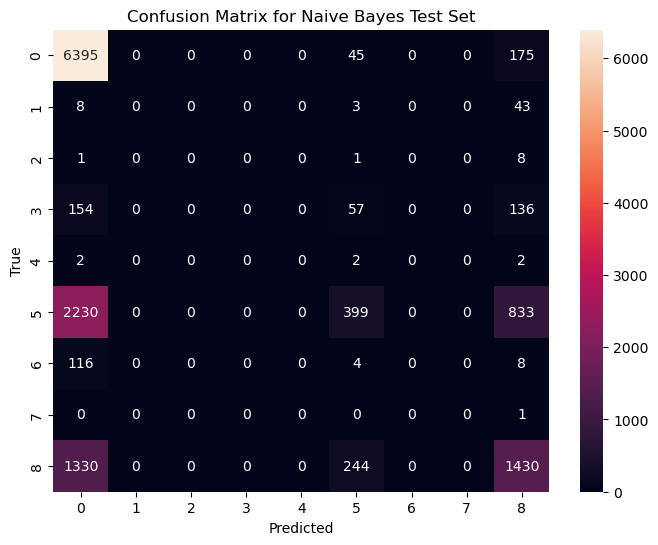

In [102]:
from sklearn.metrics import confusion_matrix
y_pred = mnb.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

unique_labels = np.unique(label)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=unique_labels , yticklabels=unique_labels)
plt.title('Confusion Matrix for Naive Bayes Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

The model accuracy for Naive Bayes is 60.3% while the test accuracy is 60.4%. This is an okay start, but we want to improve this accuracy. 

A potential reason for why this accuracy is low could be the fact that the independence assumption may not always hold true in Naive Bayes. Specifically, in the case of our dataset, the size and age features may correlate. Thus, we will now try using decision tree model. 

### Model 2. Decision Tree

Next, we will create a Decision Tree. We chose this model next because it is computationally inexpensive and easy to interpret (similar to naive bayes). However, unlike naive bayes, it is robust in presence of outliers, which will hopefully improve our accuracy rate. 

We implemented hyperparameter optimization for a Decision Tree classifier using a grid search strategy to find the identify the most effective combination of hyperparameters—specifically, the maximum depth of the Decision Tree (`max_depth`) and the number of splits in the StratifiedKFold cross-validator (`n_splits`). Further, a cross-validation was implemented to ensure the best split of the dataset.

The script tracks the best hyperparameter values by comparing mean accuracies. The split that yields the best accuracy has max_depth of 5 and N-splits of 30. 

In [96]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, export_text
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# X = dog_data.drop('Outcome Type', axis=1)
# y = dog_data['Outcome Type']

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# max_depth and n_splits we want to try
max_depth_values = [5, 10, 15, 20]
n_splits_values = [10, 20, 30, 40]

best_mean_accuracy = 0
best_max_depth = None
best_n_splits = None

# iterate over max_depth and n_splits values
for max_depth in max_depth_values:
    for n_splits in n_splits_values:
        dt_model = DecisionTreeClassifier(random_state=42, max_depth=max_depth, min_samples_split=2)
        cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

        # perform cross-validation
        cv_scores = cross_val_score(dt_model, x_train, y_train, cv=cv, scoring='accuracy')
        mean_accuracy = np.mean(cv_scores)

        # update the best parameters if the current combination is better
        if mean_accuracy > best_mean_accuracy:
            best_mean_accuracy = mean_accuracy
            best_max_depth = max_depth
            best_n_splits = n_splits
            
# calculate best model for test set accuracy
final_dt_model = DecisionTreeClassifier(random_state=42, max_depth=best_max_depth, min_samples_split=2)
final_dt_model.fit(x_train, y_train)
test_accuracy = final_dt_model.score(x_test, y_test)

# print the best hyperparameters and mean accuracy
print("Best Max Depth:", best_max_depth)
print("Best N_splits:", best_n_splits)
print("Best Mean Accuracy:", best_mean_accuracy)
print("Test Set Accuracy:", test_accuracy)

warnings.resetwarnings()


Best Max Depth: 5
Best N_splits: 30
Best Mean Accuracy: 0.6215902469497979
Test Set Accuracy: 0.6227342775372422


Now we'll visually display our results for the Decision Tree Model by using a confusion matrix map.

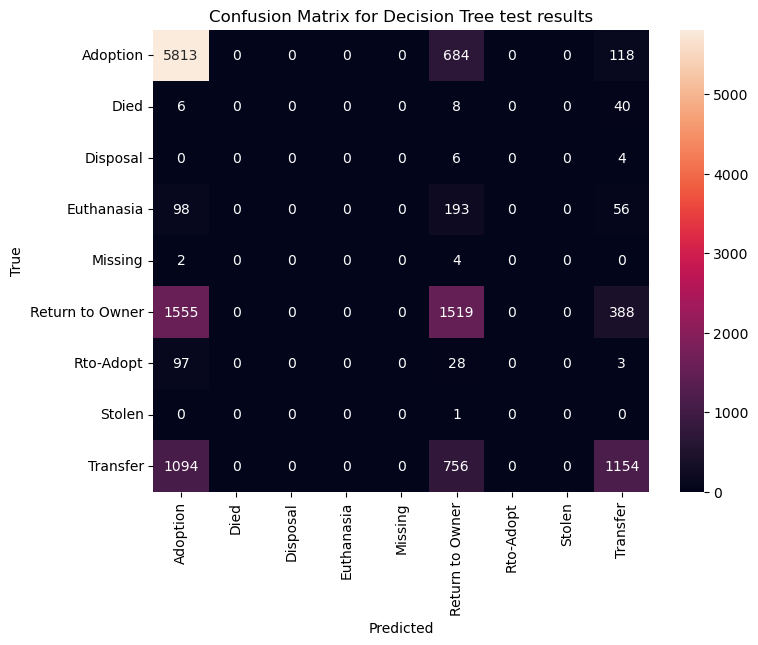

In [97]:
# confusion matrix for test set predictions
test_predictions = final_dt_model.predict(x_test)
unique_labels = np.unique(y_test)
conf_matrix = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Decision Tree test results')
plt.show()

The average accuracy for the model and the accuracy for the test set are both 62.2%. The use of the Decision tree model slightly improved our accuracy, so we're headed in the right direction.

Unfortunately decision trees are succeptible to data fragmentation (overfitting) and are sensitive to class imbalance. Thus we attempted to improve accuracy by trying out KNN, which can address class imbalances. 

### Model 3: K-Nearest Neighbor

The K-nearest neighbor modeling is an algorithm that's simple to understand and implement. It's simplicity and high accuracy potential is why we decided to use it to model our dataset. However, there are various additional considerations we must take into account when using KNN. 

For example, the majority of our outcome instances are adoption, return to owner, and transfer. These outcomes are only three out of nine potential outcomes but make up about 95% of the outcome types in our data. We need to institute a measure to combat against this class imbalance. The idea behind weighted voting is to give more importance to the minority class so that the model pays more attention to correctly classifying instances from that class. So we will use it as a hyperparameter (through grid search) for our model to check if it will resolve our class imbalance issue and improve our accuracy. 

We will also hypertune our parameter K to find a K value that fits our data well and can generalize to new data points too, avoiding overfitting or underfitting. 

Here we're training KNN Model. Grid search will allow us to optimize for our paramaters. We also want to scale our data before training the model since the KNN's algorithm is based on distance and we want to make sure each feature's distances are on the same scale. 



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

warnings.filterwarnings("ignore")

# seperate features & labels
features = dog_data.drop('Outcome Type', axis=1)
labels = dog_data['Outcome Type']

# KNN with 80-20 train/test split
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
x_test = np.ascontiguousarray(x_test)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_test_scaled = np.ascontiguousarray(x_test_scaled)


#initialize parameter grid to find best parameters
param_grid = {
    'n_neighbors': range(3, 25),
    'weights': ['uniform', 'distance']
}

#create knn classifier 
KNN_classifier = KNeighborsClassifier()

# search for best parameters
grid_search = GridSearchCV(KNN_classifier, param_grid, cv=4, scoring='accuracy')
grid_search.fit(x_train_scaled, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters for KNN model:", best_params)

warnings.resetwarnings()


Calculate the accuracy for the model

In [ ]:
from sklearn.metrics import classification_report

print("Best Cross-Validated Accuracy:", grid_search.best_score_)

# calculate accuracy using best parameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy for each trial:", accuracy)
avg_test_scores = grid_search.cv_results_['mean_test_score']
print(avg_test_scores)

# get classfification report
report = classification_report(y_test, y_pred, zero_division=1)
print("Classification Report:\n", report)

Now we'll visually display our results for the KNN Model by using a confusion matrix map.

In [ ]:
from sklearn.metrics import confusion_matrix

class_names = np.unique(dog_data['Outcome Type'])
cm = confusion_matrix(labels, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

The accuracy of the decision is _ . Interestingly, the best hyperparameter for voting is uniform voting, meaning that weighted voted was unable to successfully resolve our class imbalance. Potentially, the curse of dimensionality is what's limiting our accuracy, so we'll next try to SVM model which is resistant to it. 

### Model 4: SVM

We decided to go with using an SVM to model our dataset. It isn't succeptible to curse of dimensionality (like KNN is), and there are known algorithms to arrive at optimal solution (unlike decision trees which use a greedy approach), so it could help improve accuracy

For this model, use logistic regression and randomized search to improve computational speeds.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
warnings.filterwarnings("ignore")

param_grid = {
    'C': [0.1, 10],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'max_iter': [500], 
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] 
}

simple_model = LogisticRegression()
rand_search = RandomizedSearchCV(simple_model, param_grid, cv=4, scoring='accuracy', verbose=1, n_jobs=-1, n_iter=10)
rand_search.fit(x_train, y_train)

# evaluate
y_pred = rand_search.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression model with Randomized Search: ", accuracy)
print(classification_report(y_test, y_pred))
warnings.resetwarnings()

The accuracy of the SVM model is _ .

SVMs are computationally expensive, so implementing logistic regression and randomized search instead of using kernel methods and grid search may yield better results but would take more computational effort than feasible by our personal computers. 

So far, we've tried many of the individual base classifiers. However, our accuracy results have been limited. We'll try combining base classifers in hopes to get a better accuracy through ensembling. 

### Model 5 Ensembling:
Let's try ensembling with random forests. We decided to go with this model because ensembling base classifiers usually performs better because it combines the predictions of multiple base classifiers. 

#### Random forests: 
Let's use a GridSearchCV with a 3-fold CV and try 15, 25, and 50 base classifiers of fully grown decision trees and see which performs best. Then wrap the GridSearchCV in a cross_val_predict with 5-fold CV and display the classification report.

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
warnings.filterwarnings("ignore")

# label = label.values.ravel()
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

rf = RandomForestClassifier()

parameter = {
    'n_estimators': [15, 25, 50]
}
grid = GridSearchCV(rf, parameter, cv=3)
pred = cross_val_predict(grid, features, label, cv=5)
# CV_score = cross_val_score(grid, features, label, cv=5)
# print('Accuracy: ', CV_score.mean())
print('Classification Report: \n', classification_report(label, pred))
warnings.resetwarnings()

Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.85      0.75     33006
           1       0.02      0.01      0.01       308
           2       0.11      0.03      0.05        60
           3       0.08      0.02      0.04      1724
           4       0.00      0.00      0.00        30
           5       0.45      0.38      0.41     17289
           6       0.03      0.00      0.01       664
           7       0.00      0.00      0.00         4
           8       0.53      0.38      0.45     15049

    accuracy                           0.59     68134
   macro avg       0.21      0.19      0.19     68134
weighted avg       0.56      0.59      0.57     68134



In [92]:
# check best random forest model against test set

grid.fit(x_train, y_train)
best_model = grid.best_estimator_
test_pred = best_model.predict(x_test)
print('\nClassification Report on Test Data: \n', classification_report(y_test, test_pred, zero_division=1))


Classification Report on Test Data: 
                  precision    recall  f1-score   support

       Adoption       0.67      0.84      0.75      6615
           Died       0.04      0.02      0.02        54
       Disposal       0.50      0.10      0.17        10
     Euthanasia       0.10      0.04      0.06       347
        Missing       0.00      0.00      1.00         6
Return to Owner       0.46      0.39      0.42      3462
      Rto-Adopt       0.00      0.00      1.00       128
         Stolen       1.00      0.00      0.00         1
       Transfer       0.53      0.40      0.46      3004

       accuracy                           0.60     13627
      macro avg       0.37      0.20      0.43     13627
   weighted avg       0.56      0.60      0.58     13627



Now we'll visually display our results for the Decision Tree Model by using a confusion matrix map.

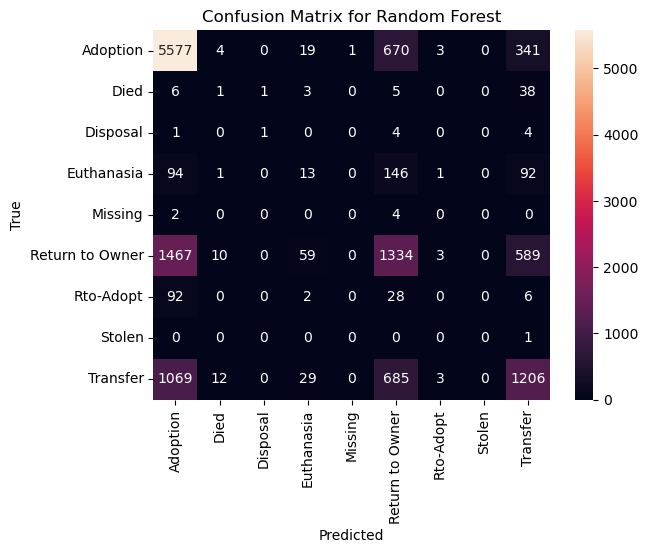

In [93]:
from sklearn.metrics import confusion_matrix

class_names = np.unique(dog_data['Outcome Type'])
cm = confusion_matrix(y_test, test_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Using random forest gives a lower accuracy rate which is not what we expected since ensembling methods should improve accuracy. 

Since we've tried many models and also attempted ensembling, it's likely that the issue with low accuracy doesn't lie within our choice of models but rather our data / class imbalance that exists within our data.  Our confusion matrix exemplifies this as the three majority classes (adoption, return to owner, and transfer) are predicted at higher accuracy rates while the other classes aren't predicted as correctly. In our search to find ways to resolve class imbalance again, we came across the Synthetic Minority Over-sampling Technique. 

Next, we will attempt oversampling our minority classes using this tecnhique to see whether that can reduce the class imbalance bias and improve accuracy rates.

#### Random Forest (with oversampling)


We use SMOTE (Synthetic Minority Over-sampling Technique) for oversampling which synthesizes new data for the minority classes by creating a new data instance by randomly sampling one of its k-nearest neighbors and adding the new record between the original instance and its neighbor in the feature space. 

In [82]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
warnings.filterwarnings("ignore")

# separate features & labels
features = dog_data.drop('Outcome Type', axis=1)
labels = dog_data['Outcome Type']

# Oversample minority classes using SMOTE
print("Label distribution before oversampling ")
print(pd.Series(labels).value_counts())

# used k_neighbors = 3 because k_neighbors needs to be a value lower than the frequency of our minority class which
# is at 4
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=3)
features_oversampled, labels_oversampled = smote.fit_resample(features, labels)
print("\nLabel distribution after oversampling ")
print(pd.Series(labels_oversampled).value_counts())

# split the train/test sets
x_train_oversample, x_test_oversample, y_train_oversample, y_test_oversample = train_test_split(features_oversampled, labels_oversampled, test_size=0.2, random_state=42)


# repeat random forest with oversampled data
y_train_oversample = y_train_oversample.values.ravel()
rf = RandomForestClassifier()

# find optimal model
parameter = {
    'n_estimators': [15, 25, 50]
}
grid = GridSearchCV(rf, parameter, cv=3)
pred = cross_val_predict(grid, x_train_oversample, y_train_oversample, cv=5)
print('Classification Report training data : \n', classification_report(y_train_oversample, pred))

warnings.resetwarnings()


Label distribution before oversampling 
Outcome Type
Adoption           33006
Return to Owner    17289
Transfer           15049
Euthanasia          1724
Rto-Adopt            664
Died                 308
Disposal              60
Missing               30
Stolen                 4
Name: count, dtype: int64
Label distribution after oversampling 
Outcome Type
Adoption           33006
Return to Owner    33006
Transfer           33006
Rto-Adopt          33006
Euthanasia         33006
Died               33006
Disposal           33006
Missing            33006
Stolen             33006
Name: count, dtype: int64
Classification Report training data : 
                  precision    recall  f1-score   support

       Adoption       0.59      0.65      0.62     26460
           Died       0.87      0.91      0.89     26416
       Disposal       0.93      0.94      0.93     26555
     Euthanasia       0.74      0.70      0.72     26286
        Missing       0.93      0.96      0.94     26426
Return to 

In [86]:
# evaluate accuracy for test set using best model
grid.fit(x_train_oversample, y_train_oversample)
best_model = grid.best_estimator_
test_pred = best_model.predict(x_test_oversample)
print('\nClassification Report on Test Data: \n', classification_report(y_test_oversample, test_pred))


Classification Report on Test Data: 
                  precision    recall  f1-score   support

       Adoption       0.59      0.67      0.62      6546
           Died       0.88      0.91      0.89      6590
       Disposal       0.93      0.94      0.93      6451
     Euthanasia       0.74      0.71      0.72      6720
        Missing       0.92      0.97      0.95      6580
Return to Owner       0.54      0.49      0.51      6655
      Rto-Adopt       0.73      0.88      0.80      6651
         Stolen       0.99      0.99      0.99      6561
       Transfer       0.66      0.47      0.55      6657

       accuracy                           0.78     59411
      macro avg       0.78      0.78      0.78     59411
   weighted avg       0.78      0.78      0.77     59411



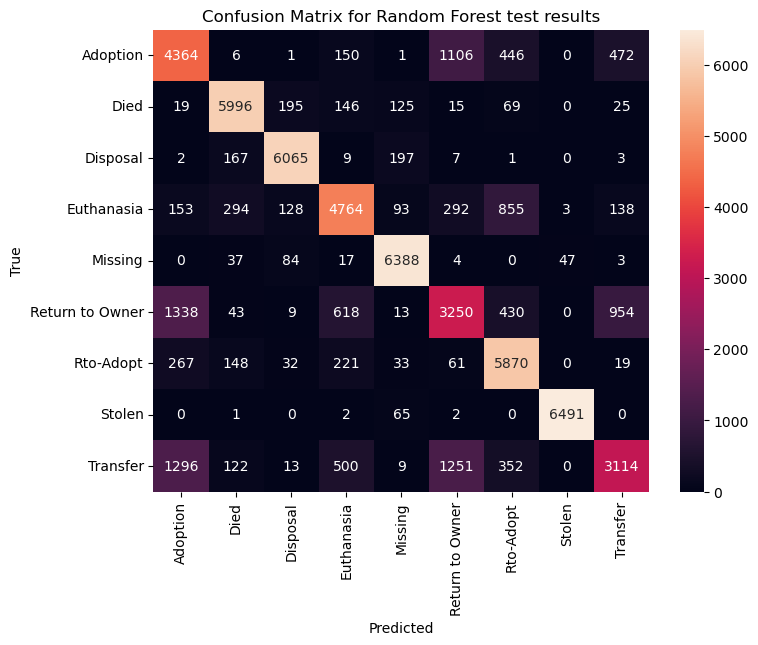

In [88]:
# confusion matrix for test set predictions
unique_labels = np.unique(y_test_oversampled)
conf_matrix = confusion_matrix(y_test_oversample, test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Random Forest test results')
plt.show()

Oversampling was able to drastically improve our accuracy rates as now are at a 78% accuracy with random forest ensembling. However, while it did improve our accuracy, increasing the number of samples that each model trains on increases computation expenses. The tradeoff is that modeling becomes more time intensive as it takes much longer for each model to run.

#### Boosting: 
Let's use a GridSearchCV with a 3-fold CV and try 15, 25, and 50 base classifiers of decision stumps. Then wrap the GridSearchCV in a cross_val_predict with 5-fold CV and display the classification report.

In [104]:
from sklearn.ensemble import AdaBoostClassifier
warnings.filterwarnings("ignore")

boost = AdaBoostClassifier()
parameter = {
    'n_estimators': [15, 25, 50]
}
grid = GridSearchCV(boost, parameter, cv=3)
pred = cross_val_predict(grid, features, labels, cv=5)
print('Classification Report: \n', classification_report(labels, pred))
warnings.resetwarnings()

Classification Report: 
                  precision    recall  f1-score   support

       Adoption       0.61      0.86      0.71     33006
           Died       0.00      0.00      0.00       308
       Disposal       0.00      0.00      0.00        60
     Euthanasia       0.00      0.00      0.00      1724
        Missing       0.00      0.13      0.00        30
Return to Owner       0.52      0.17      0.26     17289
      Rto-Adopt       0.00      0.00      0.00       664
         Stolen       0.00      0.00      0.00         4
       Transfer       0.59      0.32      0.42     15049

       accuracy                           0.53     68134
      macro avg       0.19      0.17      0.15     68134
   weighted avg       0.56      0.53      0.50     68134



### Model 6 Decision Tree with Oversampling:
As a final run, we'll try using our oversampled data with our strongest base classifier (decision tree model) to display an improvement accuracy.

In [73]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, export_text
import numpy as np
import warnings
warnings.filterwarnings("ignore")


# max_depth and n_splits we want to try
max_depth_values = [5, 10, 15, 20]
n_splits_values = [10, 20, 30, 40]

best_mean_accuracy = 0
best_max_depth = None
best_n_splits = None
x_train_oversampled, x_test_oversampled, y_train_oversampled, y_test_oversampled = train_test_split(features_oversampled, labels_oversampled, test_size=0.2, random_state=42)

# iterate over max_depth and n_splits values
for max_depth in max_depth_values:
    for n_splits in n_splits_values:
        dt_model = DecisionTreeClassifier(random_state=42, max_depth=max_depth, min_samples_split=2)
        cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

        # perform cross-validation
        cv_scores = cross_val_score(dt_model, x_train_oversampled, y_train_oversampled, cv=cv, scoring='accuracy')
        mean_accuracy = np.mean(cv_scores)

        # update the best parameters if the current combination is better
        if mean_accuracy > best_mean_accuracy:
            best_mean_accuracy = mean_accuracy
            best_max_depth = max_depth
            best_n_splits = n_splits

# calculate accuracy for our test set
final_dt_model = DecisionTreeClassifier(random_state=42, max_depth=best_max_depth, min_samples_split=2)
final_dt_model.fit(x_train_oversampled, y_train_oversampled)
test_accuracy = final_dt_model.score(x_test_oversampled, y_test_oversampled)

# print the best hyperparameters and mean accuracy
print("Best Max Depth:", best_max_depth)
print("Best N_splits:", best_n_splits)
print("Best Mean Accuracy:", best_mean_accuracy)
print("Test Accuracy:", test_accuracy)
warnings.resetwarnings()


Best Max Depth: 20
Best N_splits: 30
Best Mean Accuracy: 0.7677608949174239
Test Accuracy: 0.7650266785612092


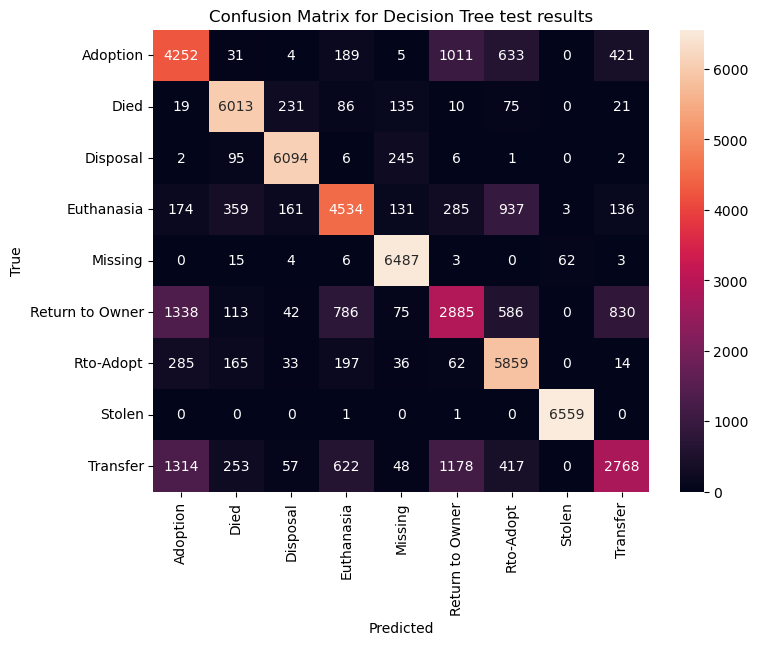

In [77]:
# confusion matrix for test set predictions
test_predictions = final_dt_model.predict(x_test_oversampled)
unique_labels = np.unique(y_test_oversampled)
conf_matrix = confusion_matrix(y_test_oversampled, test_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Decision Tree (oversampling) test results')
plt.show()

The model accuracy for the most optimal decision tree model is 76.8% while the test set accuracy is 76.5%. This is a good increase from our first attempt to use the decision tree model, demonstrating that SMOTE was successful in improving the accuracy of our model. 

## Outcome and Results <a id='Outcome'></a>

**Data Preprocessing and Feature Engineering:**
We started the project understanding our dataset and performing data preprocessing steps. A significant portion of the project timeline was devoted to **data cleaning and feature engineering**, recognizing their importance on the overall accuracy of the models. The emphasis on data cleaning involved handling missing values. Feature engineering efforts included refining color data representation, introducing a season column, and categorizing dog breeds by size. This time investment in data preparation was crucial for ensuring the reliability and accuracy of any of the predictive models we implemented.

**Modeling and Analysis:**
The project was successfully completed with an accuracy of at least 62% in determining the outcome type of dogs entering the animal center. Given the size of the dataset, we were fairly satisfied with the outcome. However, we realized we should improve the accuracy for the model to be useful for the Austin Animal Center. Various machine learning algorithms, including **Naive Bayes, K-Nearest Neighbors (KNN), Decision Tree, and Support Vector Machines (SVM)**, were employed to model our data and solve the classification problem.

**Addressing Class Imbalance:**
We noticed one potential factor contributing to the observed lower accuracy is the existence of class imbalance within the dataset. For instance, certain classes such as Adoption had a substantial number of records (73675 records), leading to accurate predictions, while underrepresented classes like Missing (84 records) faced challenges in accurate predictions. To mitigate this imbalance, we implemented techniques such as **Boosting and Synthetic Minority Over-sampling Technique (SMOTE)**.

**Model Exploration and Selection:**
The exploration of various machine learning models for predicting outcomes in the given dataset revealed interesting insights into their performances. We started with **Naive Bayes**, its simplicity and scalability proved advantageous for the large dataset, but the independence assumption limitations were evident, particularly when variables such as size and age correlated.

Next, we moved to **Decision Trees**, their computational efficiency and interpretability made them a reasonable choice. Hyperparameter optimization, specifically with a maximum depth of 5 and 30 splits, resulted in a 62.27% accuracy on the test set. However, decision trees are susceptible to data fragmentation, leading to potential overfitting, so we decided to continue exploring other models.

Next, we explored **K-Nearest Neighbors (KNN)** which presented a simple yet effective approach. To address class imbalance, weighted voting was implemented. The grid search for optimal parameters revealed the best results with three neighbors and distance-based weights, yielding a test accuracy of 60.11%.

Next, we looked into **Support Vector Machines (SVM)**, which showcased advantages such as resistance to the curse of dimensionality but came with computational expenses. Logistic regression and randomized search were employed due to their efficiency. While offering good accuracy, SVM's computational demands remained a challenge.

We implemented ensemble methods, specifically with **Random Forests** being the base classifier, which displayed promise in aggregating predictions, but the class bias toward majority classes impacted overall accuracy. As mentioned before, to combat the class imbalance, we implemented SMOTE. Oversampling through SMOTE significantly improved Random Forest's accuracy to 78%, but it increased computational costs.

The exploration with oversampling extended to **AdaBoost**, demonstrating varied precision and recall across different outcome types. Finally, **decision trees with oversampling** achieved a notable accuracy of 76.50%, showcasing the effectiveness of addressing class imbalances.

**Conclusion:**
Addressing class imbalances through techniques like oversampling proved crucial for enhancing model performance. The results underscore the trade-offs between model complexity, interpretability, and computational efficiency.

In conclusion, our project showcased the importance of adapting machine learning approaches to the characteristics of the dataset, especially when dealing with class imbalances. While each model exhibited strengths and limitations, the incorporation of oversampling techniques proved successful in enhancing overall accuracy. We enjoyed learning about new data cleaning and model methodology along the way. Additionally, we found it interesting to analyze the aspects that affect dog outcome. Future implementations may involve refining hyperparameters, exploring advanced ensemble methods, and optimizing computational efficiency to scale the model for larger datasets. Another interesting observation we researched was dogs with names ending in “y” sounds are more likely to be adopted. Given more time, we would like to analyze and prove that theory. We also hope to notify the animal shelter of this model, as a means of even slightly helping them predict dog outtake.